In [1]:
import pickle
import pandas as pd
import numpy as np
import pycaret
import catboost
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
from ydata_profiling import ProfileReport

In [3]:
#loading model
with open('1yr_graft.pkl', 'rb') as file:
    model = pickle.load(file)

In [4]:
#model methods
dir(model)

['_Pipeline__memory_full_transform',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_cache_full_transform',
 '_can_fit_resample',
 '_can_fit_transform',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_method_params',
 '_check_n_features',
 '_clear_final_estimator_fit_vars',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_feature_names_in',
 '_final_estimator',
 '_fit',
 

In [5]:
#training structure
model.feature_names_in_

['year',
 'recipient_status',
 'recipient_age',
 'recipient_bmi',
 'recipient_sex',
 'recipient_blood_type',
 'recipient_rhesus_factor',
 'MELD',
 'cold_ischemia_time',
 'donor_age',
 'donor_bmi',
 'donor_sex',
 'donor_blood_type',
 'donor_rhesus_factor',
 'donor_region',
 'donor_drugs',
 'donor_alcohol',
 'donor_alt',
 'donor_ast',
 'donor_ggt',
 'donor_bili',
 'donor_platelets',
 'donor_sodium',
 '1yr_graft']

In [6]:
data = pd.read_stata('ml_dataset_limited.dta')

In [7]:
data.columns

Index(['year', 'recipient_status', 'recipient_age', 'recipient_bmi',
       'recipient_sex', 'recipient_blood_type', 'recipient_rhesus_factor',
       'MELD', 'cold_ischemia_time', 'donor_age', 'donor_bmi', 'donor_sex',
       'donor_blood_type', 'donor_rhesus_factor', 'donor_region',
       'donor_alcohol', 'donor_alt', 'donor_ast', 'donor_ggt', 'donor_bili',
       'donor_platelets', 'donor_sodium', 'graft_1yr', 'donor_drugs'],
      dtype='object')

In [8]:
#changing col name bc STATA
data = data.rename(columns={'graft_1yr' : '1yr_graft'})

In [9]:
#running the model
pred= model.predict(data)

In [10]:
#metrics
true = data['1yr_graft']

accuracy = accuracy_score(true, pred)
precision = precision_score(true, pred)
recall = recall_score(true, pred)
f1 = f1_score(true, pred)
roc_auc = roc_auc_score(true, model.predict_proba(data)[:, 1])


print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')
print(f'ROC-AUC: {roc_auc:.3f}')

Accuracy: 0.719
Precision: 0.135
Recall: 0.267
F1 Score: 0.179
ROC-AUC: 0.534


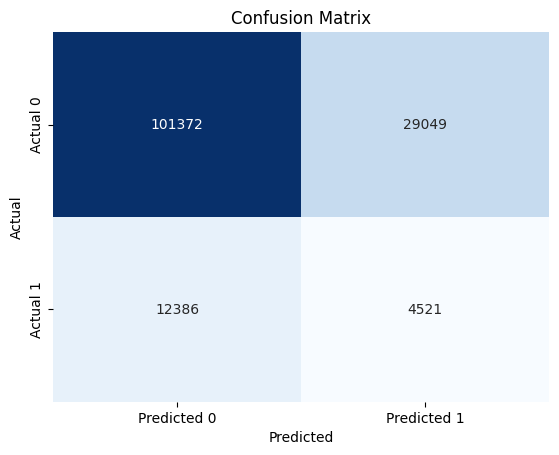

In [11]:
#confusion matrix
cm = confusion_matrix(true, pred)
sns.heatmap(cm, annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
           cbar = False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [12]:
output = pd.DataFrame({'true_1yr_graft' : true, 'predicted_1yr_graft' : pred})

In [13]:
output.to_excel('model_output.xlsx', index=False)

In [18]:
profile = ProfileReport(data, title="STAR Data Profile", minimal=True )

In [19]:
profile.to_file("data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]